# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

## Question 1: Cleaning Data

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print(df.shape, '\n')
df.head()

(299, 13) 



,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.isnull().sum()
###There are no missing values

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [4]:
df = df.drop(columns=['time'])

## Question 2

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [6]:
X = df.drop(columns = ['DEATH_EVENT'])
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred_tree)
print("Tree Accuracy for Seed 42:", acc)

Tree Accuracy for Seed 42: 0.6333333333333333


In [8]:
linear = LogisticRegression(max_iter=1000, random_state=42)
linear.fit(X_train, y_train)
y_pred_linear = linear.predict(X_test)

acc = accuracy_score(y_test, y_pred_linear)
print("Linear Model Accuracy for Seed 42:", acc)

Linear Model Accuracy for Seed 42: 0.6666666666666666


In [9]:
seed_42 = {'Tree model prediction': y_pred_tree,
           'Linear model prediction': y_pred_linear}

## Question 3

In [10]:
np.random.seed(0)
seeds = np.random.randint(1, 500, 5)
print(seeds)

[173  48 118 193 324]


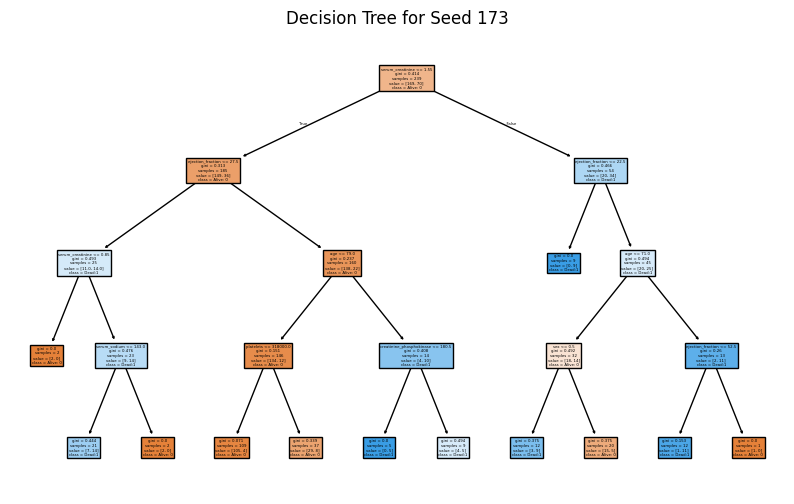

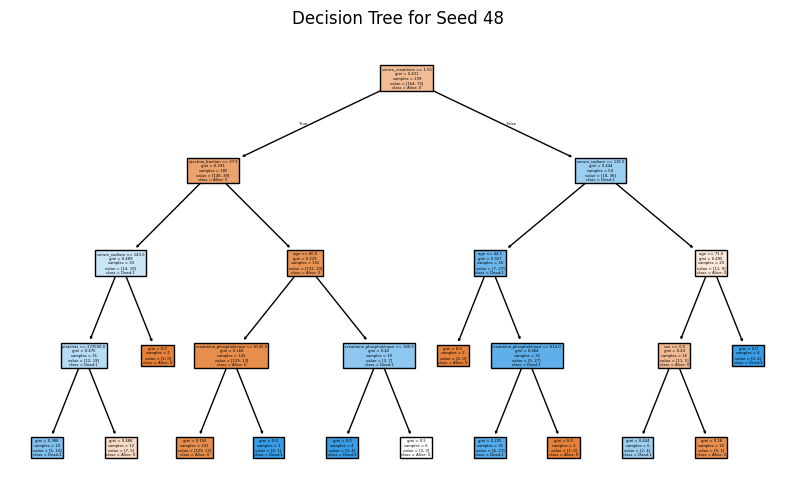

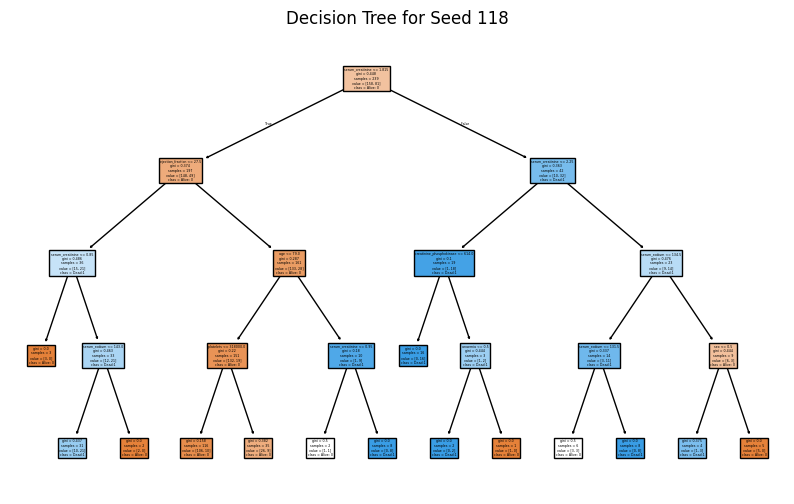

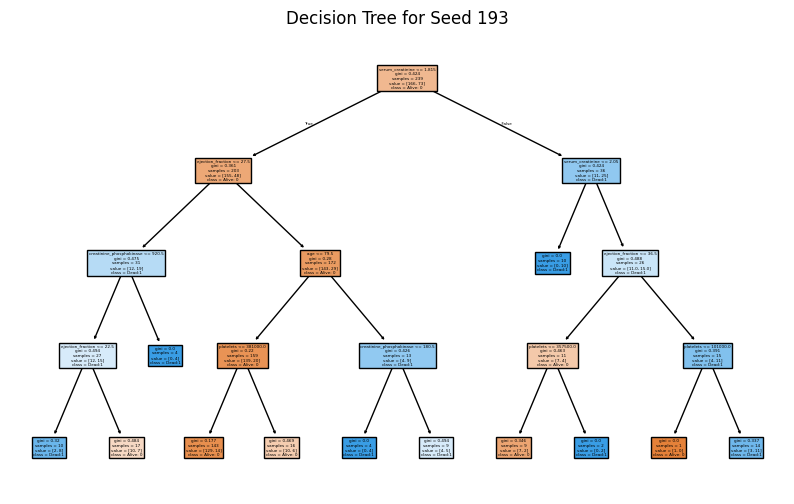

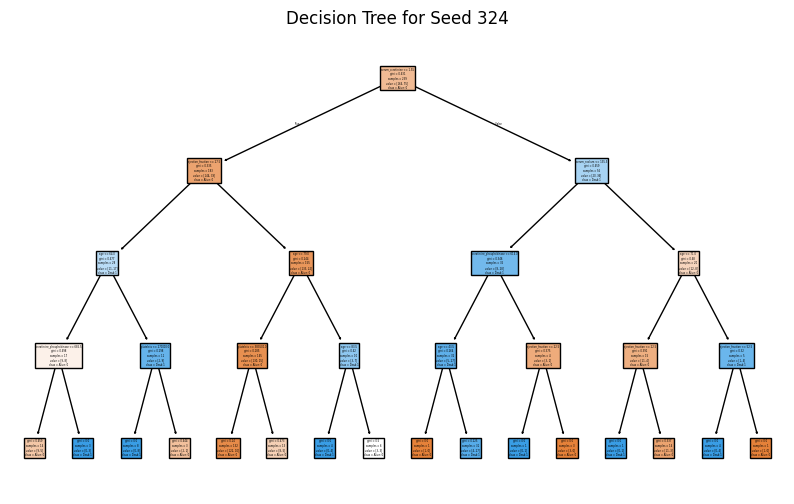

                            173       48        118       193       324
Tree Accuracy          0.716667  0.733333  0.733333  0.733333  0.716667
Linear Model Accuracy  0.683333  0.716667  0.766667  0.783333  0.733333
                            173    48     118    193    324
age                       0.063  0.065  0.064  0.049  0.058
anaemia                   0.542  0.418  0.358  0.387  0.310
creatinine_phosphokinase  0.000  0.000  0.000  0.000  0.000
diabetes                  0.004  0.189  0.175  0.250 -0.092
ejection_fraction        -0.076 -0.080 -0.070 -0.057 -0.080
high_blood_pressure       0.092  0.266  0.424  0.406  0.346
platelets                 0.000  0.000  0.000  0.000 -0.000
serum_creatinine          0.732  0.964  0.668  0.616  0.698
serum_sodium             -0.027 -0.028 -0.030 -0.024 -0.020
sex                      -0.234 -0.307  0.042 -0.297 -0.086
smoking                   0.004 -0.071  0.035  0.197 -0.050


In [18]:
from sklearn.tree import plot_tree

predictions = {}
accuracy_scores = {}
coefs = {}

for seed in seeds:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    tree = DecisionTreeClassifier(max_depth=4, random_state=seed)
    tree.fit(X_train, y_train)
    y_pred_tree = tree.predict(X_test)
    acc_tree = accuracy_score(y_test, y_pred_tree)
    plt.figure(figsize=(10, 6))
    plot_tree(tree, filled=True, feature_names=X.columns,
              class_names=['Alive: 0', 'Dead:1'])
    plt.title(f'Decision Tree for Seed {seed}')
    plt.show()

    linear = LogisticRegression(max_iter=2000, random_state=seed)
    linear.fit(X_train, y_train)
    y_pred_linear = linear.predict(X_test)
    acc_linear = accuracy_score(y_test, y_pred_linear)

    predictions[seed] = {'Tree model prediction': y_pred_tree,
                       'Linear model prediction': y_pred_linear}

    accuracy_scores[seed] = {'Tree Accuracy': acc_tree,
                             'Linear Model Accuracy': acc_linear}
    coefs[seed] = dict(zip(X.columns, linear.coef_[0]))

accuracy = pd.DataFrame(accuracy_scores)
coefficients = pd.DataFrame(coefs)
print(accuracy)
print(coefficients.round(3))